In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py

In [38]:
df_original = pd.read_csv('basic_cleaned.csv')
df = df_original.copy()

# It is a good practise to make a copy of dataset so we generated a copy for quick fixes later if necessary

In [39]:
df.shape

# Shape lets us know about the number of rows and columns available for our dataset

(1927085, 41)

In [40]:
df.columns

# Shows all columns available

Index(['Unnamed: 0', 'Unnamed: 0.1', 'proto', 'proto_number', 'saddr', 'sport',
       'daddr', 'dport', 'pkts', 'bytes', 'state', 'dur', 'average_dur',
       'stddev_dur', 'total_dur', 'min_dur', 'max_dur', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP',
       'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport',
       'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP',
       'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

In [41]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# we drop 1st column here as it is just ID and not required

In [42]:
df_attacked = df[ (df['category'] =='DDoS') ]

# we are taking all the malicious packets data into a data frame called df_attacked

In [43]:
df_normal = df[ (df['category'] =='Normal') ]

# we are taking all the normal packets data into a data frame called df_normal

In [44]:
def gen_bar(column,num_observ,df_type):
    base_color = sb.color_palette()[0]
    bot_order = df_type[column].value_counts()[:num_observ].index
    sb.countplot(data = df_type, y = column, color = base_color, order = bot_order)
    
# This is a function that is used to plot a bar graph by taking three parameters:
  # 1. columns: Tells about the name of the column needed.
  # 2. num_observ: It takes the number of observations for which graph needs to be plotted.
  # 3. df_type: This parameter takes the datafram used for analysis.

In [45]:
def gen_pie(column,num_observ,df_type):
    sorted_counts = df_type[column].value_counts()[:num_observ]
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.7,counterclock = False)
    plt.axis('square')
# This is a function that is used to plot a pie chart by taking three parameters:
  # 1. columns: Tells about the name of the column needed.
  # 2. num_observ: It takes the number of observations for which graph needs to be plotted.
  # 3. df_type: This parameter takes the datafram used for analysis.

In [46]:
df.proto.unique()

# unique method is used to get the unique values available for that particular column.

array(['tcp', 'arp', 'udp', 'ipv6-icmp'], dtype=object)

In [47]:
df.proto.value_counts()

# value count tells us about the number of observations per unique entities in descending order.

tcp          978397
udp          948598
arp              82
ipv6-icmp         8
Name: proto, dtype: int64

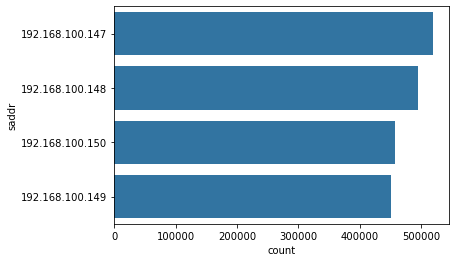

In [48]:
gen_bar('saddr',4,df_attacked)

# we called the function to generate the bar graph for top 4 values of senders address in malicious dataset.

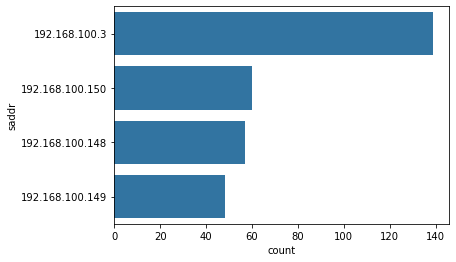

In [49]:
gen_bar('saddr',4,df_normal)

# we called the function to generate the bar graph for top 4 values of senders address in normal dataset.

In [50]:
df.daddr.value_counts().iloc[:4]

# getting top 4 counts from destination address.

192.168.100.3      1923162
192.168.100.147       1336
192.168.100.150       1313
192.168.100.149        579
Name: daddr, dtype: int64

In [51]:
df_attacked.sport.value_counts()

# getting the count of values of the senders port number.

 80       3485
-1          35
 42458      31
 42472      31
 42470      31
          ... 
 26843      27
 26842      27
 26837      27
 26836      27
 26848      27
Name: sport, Length: 65537, dtype: int64

In [52]:
df_attacked.dport.value_counts()

# getting the count of values of the destination port number.

 80       1923117
-1             35
 6404           2
 6396           2
 6393           2
           ...   
 13066          1
 13067          1
 13070          1
 13071          1
 26821          1
Name: dport, Length: 3409, dtype: int64

In [53]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_attacked.pkts.describe()

# getting a statistics of malicious packet count in each transaction

count   1926608.00000
mean          7.33000
std           3.71533
min           1.00000
25%           5.00000
50%           7.00000
75%          10.00000
max          20.00000
Name: pkts, dtype: float64

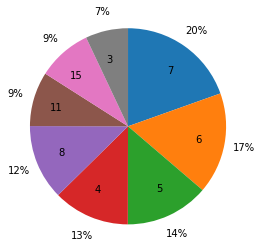

In [54]:
gen_pie('pkts',8,df_attacked)

# generating a pie chart for attack dataset about the packets per transcition number.

In [55]:
df_normal.pkts.describe()

# getting a statistics of normal packet count in each transaction

count     477.00000
mean     2366.16143
std      9847.58736
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max     70057.00000
Name: pkts, dtype: float64

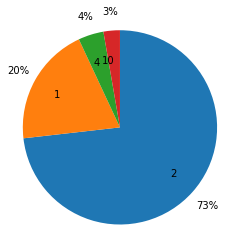

In [56]:
gen_pie('pkts',4,df_normal)

# generating a pie chart for normal dataset about the packets per transcition number.

In [57]:
df_attacked.bytes.describe()

# getting a statistics of malicious bytes in each transmission

count   1926608.00000
mean        615.24861
std         227.91679
min          60.00000
25%         420.00000
50%         616.00000
75%         780.00000
max        6322.00000
Name: bytes, dtype: float64

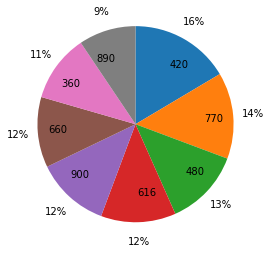

In [58]:
gen_pie('bytes',8,df_attacked)

# generating a pie chart for attack dataset for bytes involved in transmission of the packet.

In [59]:
df_normal.bytes.describe()

# getting a statistics of normal bytes in each transmission

count        477.00000
mean     2064511.46751
std      9636728.40103
min           60.00000
25%          172.00000
50%          183.00000
75%          891.00000
max     71833345.00000
Name: bytes, dtype: float64

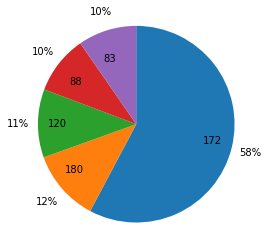

In [60]:
gen_pie('bytes',5,df_normal)

# generating a pie chart for normal dataset for bytes involved in transmission of the packet

In [61]:
sorted_counts = df['state'].value_counts()
sorted_counts

# Sorting the state of transaction

INT    948382
REQ    538593
RST    437281
ACC      2476
CON       329
FIN        16
NRS         8
Name: state, dtype: int64

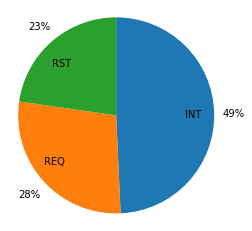

In [62]:
gen_pie('state',3,df_attacked)

# generating pie chart for top 3 state value in malicious dataset

<AxesSubplot:>

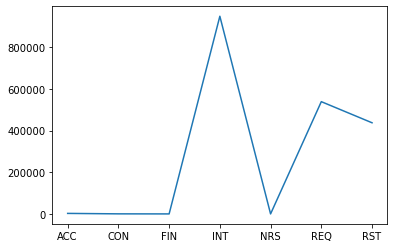

In [63]:
df['state'].value_counts().sort_index().plot.line()

# getting a line plot about the states.

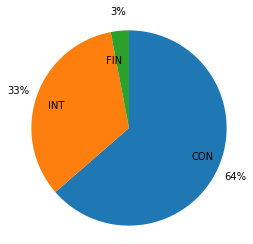

In [64]:
gen_pie('state',3,df_normal)

# generating pie chart for top 3 state value in normal dataset

<AxesSubplot:>

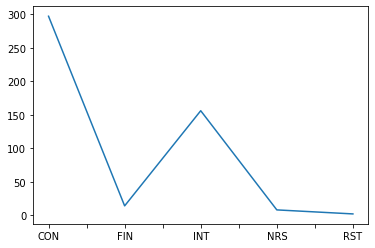

In [65]:
df_normal['state'].value_counts().sort_index().plot.line()

# getting a line plot about the states.

In [66]:
df_attacked.dur.describe()

# statistics about duration of packet transfer of attack dataset

count   1926608.00000
mean         14.79853
std           8.78071
min           0.00000
25%          12.12172
50%          13.68447
75%          14.54814
max         113.55770
Name: dur, dtype: float64

In [67]:
df_attacked.dur.value_counts()

# value counts of duration of attacked packets

0.00000     84237
12.16235      182
12.38465      169
13.96231      167
12.38396      166
            ...  
38.69258        1
14.74405        1
38.96214        1
38.94388        1
6.40642         1
Name: dur, Length: 368548, dtype: int64

In [68]:
df_normal.dur.value_counts()

0.00000       80
1685.70691     4
0.16599        2
0.00732        2
1745.80786     2
              ..
981.24768      1
2.50001        1
61.45535       1
1453.82812     1
0.28051        1
Name: dur, Length: 386, dtype: int64

<AxesSubplot:ylabel='Frequency'>

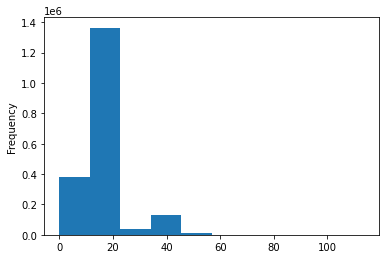

In [69]:
df_attacked['dur'].plot.hist()

# plotting a histogram for attacked packet duration across the dataset

<AxesSubplot:ylabel='Frequency'>

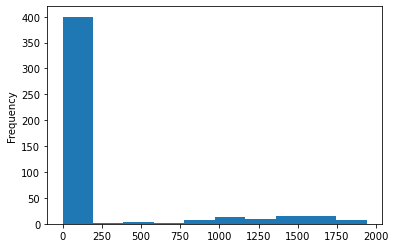

In [70]:
df_normal['dur'].plot.hist()

# plotting a histogram for normal packet duration across the dataset

In [71]:
df_attacked.average_dur.describe()

count   1926608.00000
mean          2.54962
std           1.40421
min           0.00000
25%           2.01624
50%           2.75982
75%           3.65986
max           4.98188
Name: average_dur, dtype: float64

<AxesSubplot:ylabel='average_dur'>

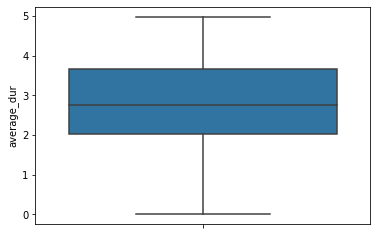

In [72]:
sb.boxplot( y=df_attacked["average_dur"] )

# making box plot for attacked dataset average duration.

In [73]:
df_normal.average_dur.describe()

count   477.00000
mean      0.49936
std       1.33180
min       0.00000
25%       0.00000
50%       0.00749
75%       0.18034
max       4.96714
Name: average_dur, dtype: float64

<AxesSubplot:ylabel='average_dur'>

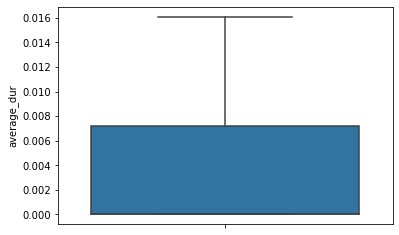

In [74]:
sb.boxplot( y=df_normal[df_normal["average_dur"] < 0.02].average_dur )

# making box plot for normal dataset average duration.

In [75]:
df_attacked.stddev_dur.describe()

count   1926608.00000
mean          0.94536
std           0.75180
min           0.00000
25%           0.12302
50%           0.93764
75%           1.69009
max           2.49676
Name: stddev_dur, dtype: float64

In [76]:
df_attacked.stddev_dur.value_counts()

0.00000    208507
1.92082       204
1.91372       174
1.91140       152
1.90994       152
            ...  
0.12413         1
0.12830         1
0.12462         1
1.74749         1
0.54413         1
Name: stddev_dur, Length: 277406, dtype: int64

<AxesSubplot:ylabel='stddev_dur'>

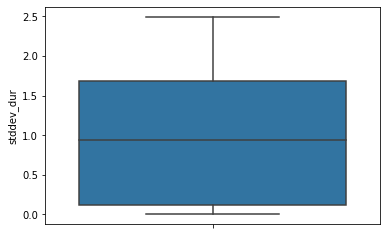

In [77]:
sb.boxplot( y=df_attacked["stddev_dur"] )

In [78]:
df_normal.stddev_dur.describe()

count   477.00000
mean      0.03933
std       0.18975
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.89318
Name: stddev_dur, dtype: float64

In [79]:
df_normal.stddev_dur.value_counts()

0.00000    384
0.00003      4
0.00002      2
0.00001      2
0.00002      2
          ... 
0.00001      1
0.12178      1
0.00790      1
0.00758      1
1.23563      1
Name: stddev_dur, Length: 87, dtype: int64

In [80]:
df_attacked.total_dur.describe()

count   1926608.00000
mean          7.22696
std           4.08917
min           0.00000
25%           4.54430
50%           8.11687
75%          10.52129
max          16.91227
Name: total_dur, dtype: float64

<AxesSubplot:ylabel='total_dur'>

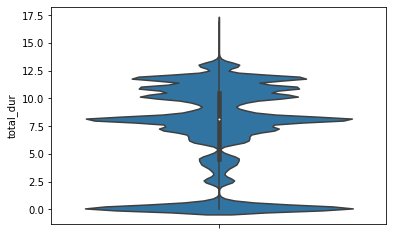

In [81]:
sb.violinplot( y=df_attacked["total_dur"] )

# adding violin plot for attacked dataset for total duration

In [82]:
df_normal.total_dur.describe()

count    477.00000
mean     127.79135
std      431.35016
min        0.00000
25%        0.00000
50%        0.00749
75%        0.21589
max     1913.19360
Name: total_dur, dtype: float64

<AxesSubplot:ylabel='total_dur'>

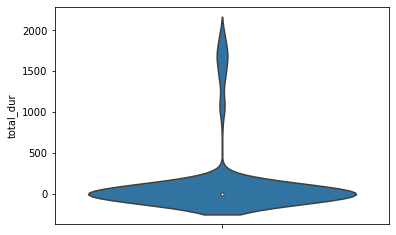

In [83]:
sb.violinplot( y=df_normal["total_dur"] )

# adding violin plot for normal dataset for total duration

In [84]:
df_attacked.min_dur.describe()

count   1926608.00000
mean          1.30186
std           1.49105
min           0.00000
25%           0.00000
50%           0.16964
75%           2.76341
max           4.98047
Name: min_dur, dtype: float64

<AxesSubplot:ylabel='min_dur'>

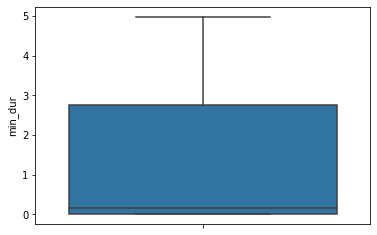

In [85]:
sb.boxplot( y=df_attacked["min_dur"] )

In [86]:
df_normal.min_dur.describe()

count   477.00000
mean      0.31378
std       0.95451
min       0.00000
25%       0.00000
50%       0.00743
75%       0.16901
max       4.95045
Name: min_dur, dtype: float64

<AxesSubplot:ylabel='min_dur'>

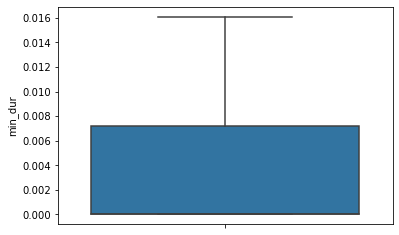

In [87]:
sb.boxplot( y=df_normal[df_normal["min_dur"] < 0.0175].min_dur )

In [88]:
df_attacked.max_dur.describe()

count   1926608.00000
mean          3.34896
std           1.64657
min           0.00000
25%           3.26208
50%           4.05764
75%           4.17246
max           5.00000
Name: max_dur, dtype: float64

<AxesSubplot:ylabel='max_dur'>

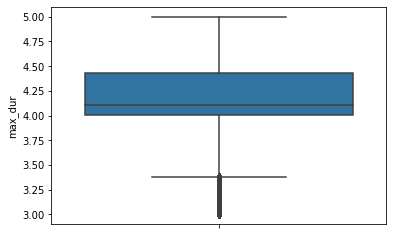

In [89]:
sb.boxplot( y=df_attacked[df_attacked["max_dur"] > 3].max_dur )

In [90]:
df_normal.max_dur.describe()

count   477.00000
mean      0.53850
std       1.39801
min       0.00000
25%       0.00000
50%       0.00749
75%       0.21490
max       5.00000
Name: max_dur, dtype: float64

<AxesSubplot:ylabel='max_dur'>

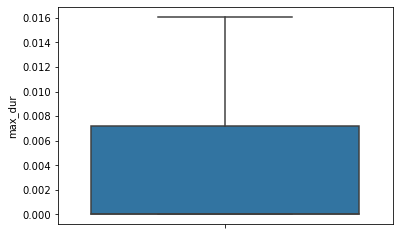

In [91]:
sb.boxplot( y=df_normal[df_normal["max_dur"] < 0.02].max_dur )

<AxesSubplot:>

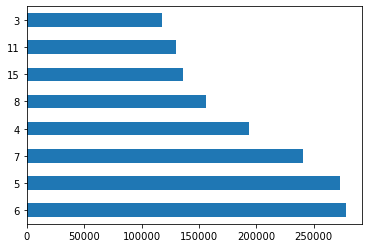

In [92]:
df_attacked.spkts.value_counts()[:8].plot(kind='barh')

In [93]:
df_attacked.spkts.describe()

count   1926608.00000
mean          7.02265
std           3.80054
min           1.00000
25%           4.00000
50%           6.00000
75%           9.00000
max          16.00000
Name: spkts, dtype: float64

In [94]:
df_normal.spkts.describe()

count     477.00000
mean     1728.58700
std      6527.30286
min         1.00000
25%         1.00000
50%         1.00000
75%         2.00000
max     35029.00000
Name: spkts, dtype: float64

In [95]:
df_normal["spkts"].value_counts()[:5]

1    306
2     84
5     12
3      9
4      6
Name: spkts, dtype: int64

<AxesSubplot:>

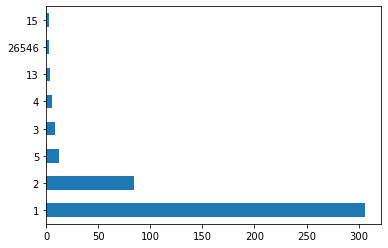

In [96]:
df_normal.spkts.value_counts()[:8].plot(kind='barh')

<AxesSubplot:>

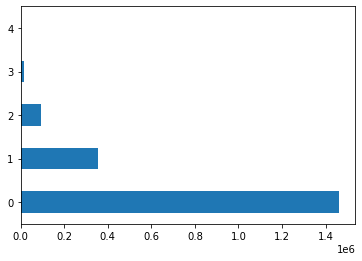

In [97]:
df_attacked.dpkts.value_counts()[:8].plot(kind='barh')

In [98]:
df_attacked["dpkts"].describe()

count   1926608.00000
mean          0.30734
std           0.60690
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           4.00000
Name: dpkts, dtype: float64

<AxesSubplot:>

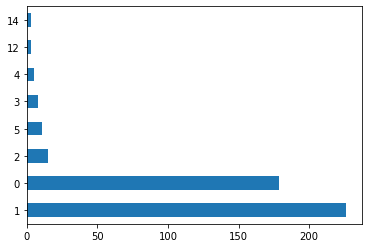

In [99]:
df_normal.dpkts.value_counts()[:8].plot(kind='barh')

In [100]:
df_normal["dpkts"].describe()

count     477.00000
mean      637.57442
std      4311.35678
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max     35029.00000
Name: dpkts, dtype: float64

<AxesSubplot:>

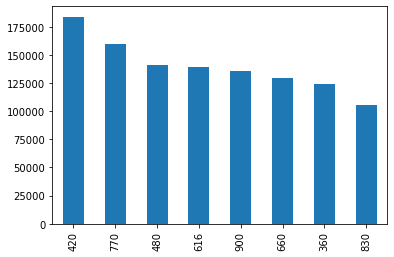

In [101]:
df_attacked.sbytes.value_counts()[:8].plot(kind="bar")

<AxesSubplot:>

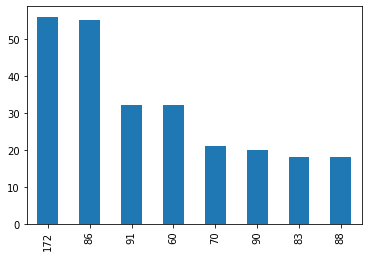

In [102]:
df_normal.sbytes.value_counts()[:8].plot(kind="bar")

In [103]:
df_attacked.sbytes.describe()

count   1926608.00000
mean        596.53847
std         216.14277
min          60.00000
25%         420.00000
50%         616.00000
75%         770.00000
max        5548.00000
Name: sbytes, dtype: float64

<AxesSubplot:ylabel='sbytes'>

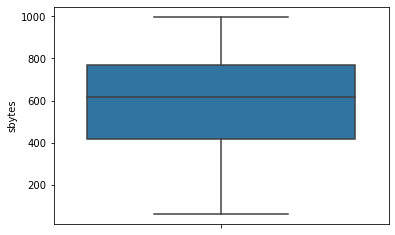

In [104]:
sb.boxplot( y=df_attacked[df_attacked["sbytes"] < 1000].sbytes ) 

In [105]:
df_normal.sbytes.describe()

count        477.00000
mean     1442486.37945
std      6147351.39433
min           42.00000
25%           86.00000
50%           92.00000
75%          172.00000
max     37747017.00000
Name: sbytes, dtype: float64

<AxesSubplot:ylabel='sbytes'>

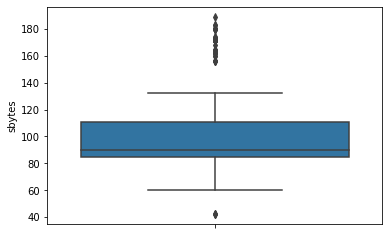

In [106]:
sb.boxplot( y=df_normal[df_normal["sbytes"]  < 200 ].sbytes )   

<AxesSubplot:>

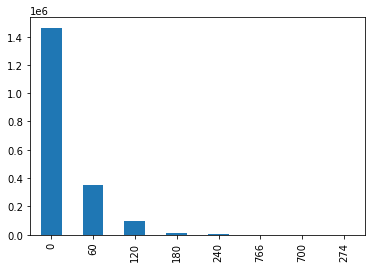

In [107]:
df_attacked.dbytes.value_counts()[:8].plot(kind="bar")

<AxesSubplot:>

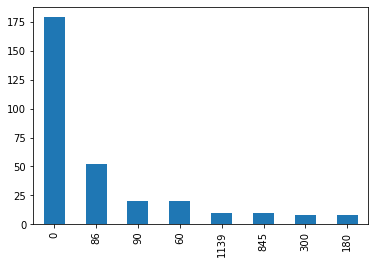

In [108]:
df_normal.dbytes.value_counts()[:8].plot(kind="bar")

In [109]:
df_attacked.dbytes.describe()

count   1926608.00000
mean         18.71014
std          39.76166
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max         774.00000
Name: dbytes, dtype: float64

In [110]:
df_attacked.dbytes.value_counts()

0      1463327
60      353229
120      93356
180      14413
240       1286
766        810
700        176
274          9
774          2
Name: dbytes, dtype: int64

In [111]:
df_get_attacked = df_attacked[df_attacked["dbytes"] != 0]
df_get_attacked["dbytes"].describe()

count   463281.00000
mean        77.80832
std         44.45672
min         60.00000
25%         60.00000
50%         60.00000
75%         60.00000
max        774.00000
Name: dbytes, dtype: float64

In [112]:
df_normal.dbytes.describe()

count        477.00000
mean      622025.08805
std      4296180.13084
min            0.00000
25%            0.00000
50%           86.00000
75%          390.00000
max     34181742.00000
Name: dbytes, dtype: float64

<AxesSubplot:ylabel='dbytes'>

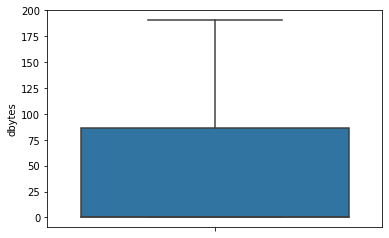

In [113]:
sb.boxplot( y=df_normal[df_normal["dbytes"]  < 200 ].dbytes ) 

In [114]:
df_attacked.rate.describe()

count   1926608.00000
mean          0.64506
std          31.38203
min           0.00000
25%           0.27143
50%           0.46379
75%           0.65156
max       43478.26172
Name: rate, dtype: float64

<AxesSubplot:ylabel='rate'>

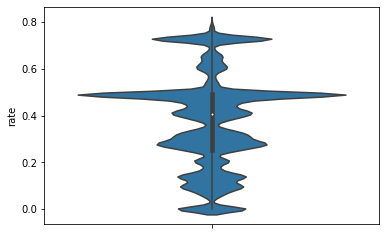

In [115]:
sb.violinplot( y=df_attacked[df_attacked["rate"]  < 0.8].rate ) 

In [116]:
df_normal.rate.describe()

count     477.00000
mean     1068.10346
std      7232.16636
min         0.00000
25%         0.22794
50%         4.55544
75%        39.86750
max     90909.09375
Name: rate, dtype: float64

<AxesSubplot:ylabel='rate'>

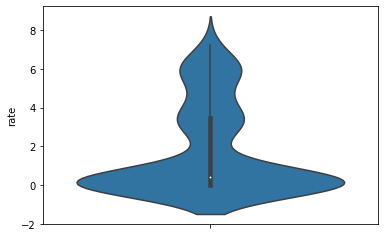

In [117]:
sb.violinplot( y=df_normal[df_normal["rate"]  < 8].rate )  

In [118]:
df_attacked.srate.describe()

count   1926608.00000
mean          0.51535
std           0.60616
min           0.00000
25%           0.24986
50%           0.41008
75%           0.63466
max           7.33945
Name: srate, dtype: float64

<AxesSubplot:ylabel='srate'>

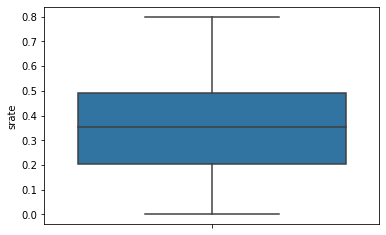

In [119]:
sb.boxplot( y=df_attacked[df_attacked["srate"]<0.8].srate)

In [120]:
df_normal.srate.describe()

count       477.00000
mean       5943.69924
std       58124.55734
min           0.00000
25%           0.00000
50%           0.00000
75%           0.39981
max     1000000.00000
Name: srate, dtype: float64

In [121]:
df_normal.srate.value_counts()

0.00000     306
0.00275       8
0.00111       4
0.39981       3
0.39982       2
           ... 
18.04768      1
18.04716      1
0.90097       1
0.12326       1
0.86790       1
Name: srate, Length: 147, dtype: int64

In [122]:
df_get_attacked = df_attacked[df_attacked["srate"] != 0]
df_get_attacked["srate"].value_counts()

1.00271    813
0.49449    791
0.48444    782
0.48450    768
0.49070    757
          ... 
3.20625      1
3.20623      1
3.20622      1
3.20621      1
0.33056      1
Name: srate, Length: 68483, dtype: int64

<AxesSubplot:ylabel='srate'>

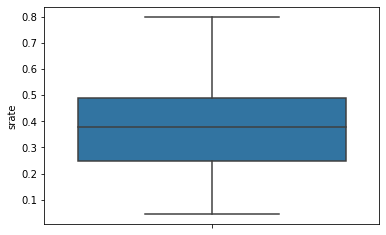

In [123]:
sb.boxplot( y=df_get_attacked[df_get_attacked["srate"] < 0.8].srate)

In [124]:
df_attacked.drate.describe()

count   1926608.00000
mean          0.00704
std           0.03567
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.06458
Name: drate, dtype: float64

In [125]:
df_attacked.drate.value_counts()

0.00000    1816556
0.02771        135
0.07141        123
0.02709        122
0.06634        116
            ...   
0.59078          1
0.59085          1
0.59089          1
0.16117          1
0.46828          1
Name: drate, Length: 6713, dtype: int64

<AxesSubplot:ylabel='drate'>

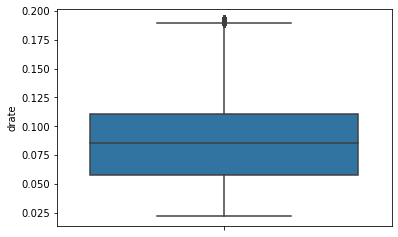

In [126]:
df_get_attacked = df_attacked[df_attacked["drate"] != 0]
sb.boxplot( y=df_get_attacked[df_get_attacked["drate"] < 0.2].drate)

In [127]:
df_normal.drate.describe()

count    477.00000
mean      11.02854
std      133.64322
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max     2178.64917
Name: drate, dtype: float64

In [128]:
df_normal.drate.value_counts()

0.00000       405
0.00275         8
17.63355        2
0.00176         2
0.00507         1
             ... 
9.83423         1
8.60459         1
16.03649        1
2178.64917      1
0.86790         1
Name: drate, Length: 64, dtype: int64

In [129]:
df_attacked.subcategory.value_counts()

TCP     977380
UDP     948239
HTTP       989
Name: subcategory, dtype: int64

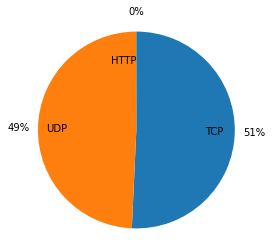

In [130]:
gen_pie('subcategory',3,df_attacked)